In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [2]:
with open('/Users/benschlagman/Desktop/Sports-Betting-Research-Repo/in_play/ladders.json', 'r') as file:
    ladders = json.load(file)

In [5]:
def get_prices_and_ltp(runner_data):
    best_back = runner_data.get('atb', [])[0][0] if runner_data.get('atb') else None
    best_lay = runner_data.get('atl', [])[0][0] if runner_data.get('atl') else None
    ltp = runner_data.get('ltp', None)
    return best_back, best_lay, ltp


extracted_data = []
current_inPlay = None
id = ladders[0].get('metadata', None)

for update in ladders:
    pt = update['pt']
    runner_keys = list(update['runners'].keys())
    if 'marketDefinition' in update:
        current_inPlay = update['marketDefinition'].get('inPlay', None)

    runner1_best_back, runner1_best_lay, runner1_ltp = get_prices_and_ltp(update['runners'][runner_keys[0]])
    runner2_best_back, runner2_best_lay, runner2_ltp = get_prices_and_ltp(update['runners'][runner_keys[1]])
    runner3_best_back, runner3_best_lay, runner3_ltp = get_prices_and_ltp(update['runners'][runner_keys[2]])

    extracted_data.append({
        'pt': pt,
        'id': id,
        'runner1_best_back': runner1_best_back,
        'runner1_best_lay': runner1_best_lay,
        'runner1_ltp': runner1_ltp,
        'runner2_best_back': runner2_best_back,
        'runner2_best_lay': runner2_best_lay,
        'runner2_ltp': runner2_ltp,
        'runner3_best_back': runner3_best_back,
        'runner3_best_lay': runner3_best_lay,
        'runner3_ltp': runner3_ltp,
        'inPlay': current_inPlay

    })

    # Create a DataFrame for this match and add it to the list
df_match = pd.DataFrame(extracted_data)
df_match = df_match[df_match['inPlay'] == True]


In [6]:
# Define the date and time range
start_time = pd.to_datetime('2023-01-01 14:00')
end_time = pd.to_datetime('2023-01-01 15:35')

# Filter the DataFrame for the specified time range
df_match['pt'] = pd.to_datetime(df_match['pt'], errors='coerce')

filtered_df = df_match[(df_match['pt'] >= start_time) & (df_match['pt'] <= end_time)]

# Plotting code

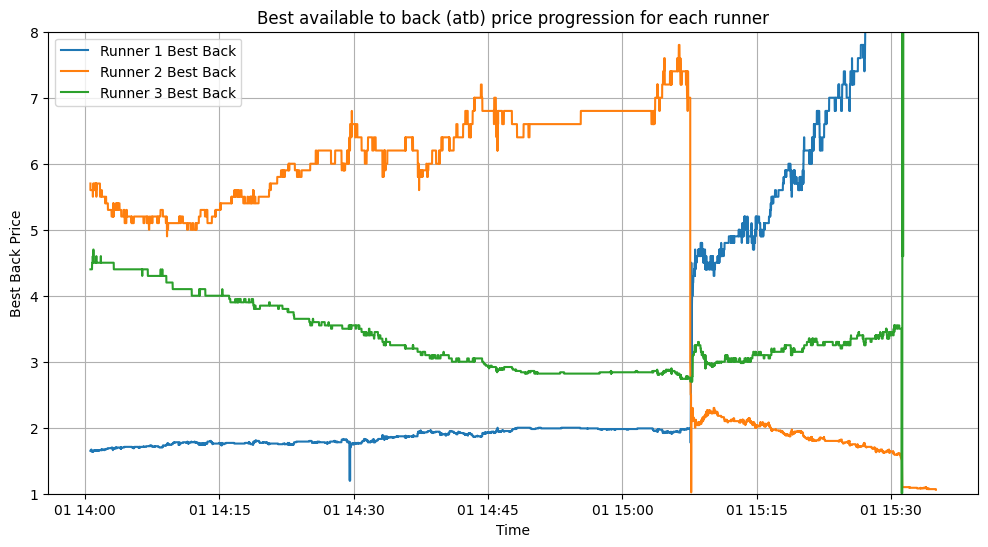

In [7]:

# Plotting the best back prices for Runner 2 over time
plt.figure(figsize=(12, 6))

plt.plot(filtered_df['pt'], filtered_df['runner1_best_back'], label='Runner 1 Best Back')
plt.plot(filtered_df['pt'], filtered_df['runner2_best_back'], label='Runner 2 Best Back')
plt.plot(filtered_df['pt'], filtered_df['runner3_best_back'], label='Runner 3 Best Back')
# Adding titles and labels
plt.title('Best available to back (atb) price progression for each runner')
plt.xlabel('Time')
plt.ylabel('Best Back Price')
plt.ylim(1, 8)  # Set the y-axis limits from 1 to 8
plt.legend()
plt.grid(True)

# Display the plot
plt.show()